In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage
from importlib import reload
import folded_dataset
reload(folded_dataset)

<module 'folded_dataset' from '/scr/mdoron/morphem/folded_dataset.py'>

In [2]:
root_dir = '/scr/zchen/datasets/morphem_70k/'
combined_metadata_path = root_dir + 'combined_metadata.csv'
combined_metadata = pd.read_csv(combined_metadata_path)

In [3]:
resize_transformation = folded_dataset.Single_cell_centered(224)
center_crop_transformation = folded_dataset.RandomResizedCrop(224, (0.8, 1.0))

In [4]:
dataset = folded_dataset.SingleCellDataset(csv_file=combined_metadata_path,
                                           root_dir=root_dir,
                                           transform=center_crop_transformation)


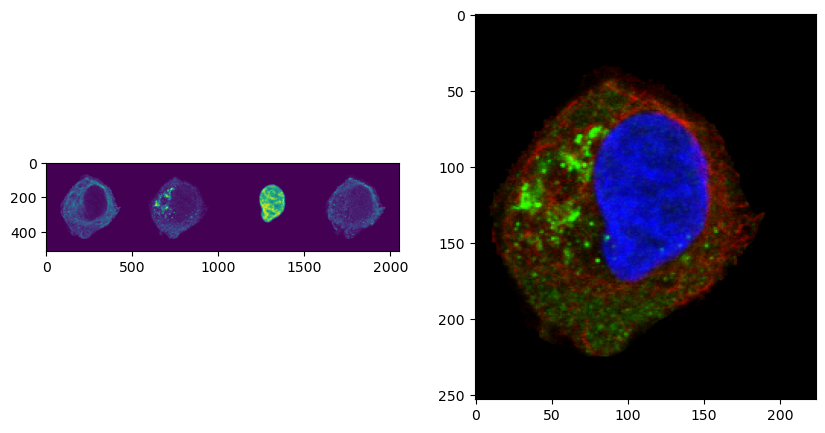

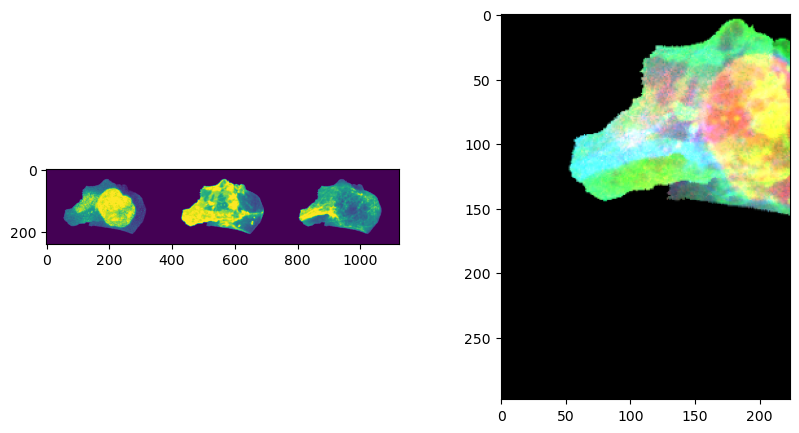

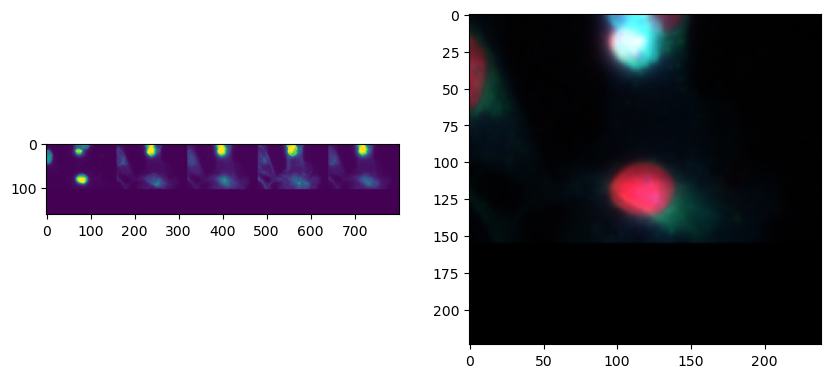

In [5]:
sample_inds = [0, 100000, 190001]
for ind in sample_inds:
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(io.imread(root_dir + combined_metadata.iloc[ind].file_path))
    axes[1].imshow(dataset[ind][0].numpy().transpose(1,2,0)[:,:,:3])
